In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.8.2'

In [3]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
!cp kaggle.json ~/.kaggle/

In [6]:
!chmod 600 /root/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
!unzip /content/face-expression-recognition-dataset.zip

Archive:  /content/face-expression-recognition-dataset.zip
replace images/images/train/angry/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
train_datagen = ImageDataGenerator(shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True, rescale = 1/255, dtype = 'float32')
train_data = train_datagen.flow_from_directory('/content/images/train', target_size = (144, 144), batch_size = 64, class_mode = 'categorical')

Found 28821 images belonging to 7 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1/255, dtype = 'float32')
test_data = test_datagen.flow_from_directory('/content/images/validation', target_size = (144, 144), batch_size = 32, class_mode = 'categorical')

Found 7066 images belonging to 7 classes.


In [4]:
import matplotlib.pyplot as plt

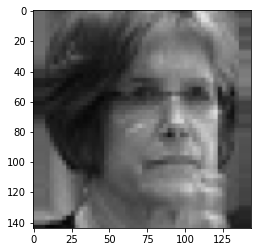

In [5]:
plt.imshow(train_data[0][0][0])
plt.show()

In [6]:
train_data[0][1][0]

array([1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [33]:
CNN = Sequential()
CNN.add(Conv2D(filters = 64, kernel_size = 3, strides = 2, activation = 'relu', use_bias = True, padding = 'same', input_shape = [144, 144, 3]))
CNN.add(MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))
CNN.add(Conv2D(filters = 56, kernel_size = 2, strides = 1, activation = 'relu', use_bias = True))
CNN.add(MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))
CNN.add(Conv2D(filters = 16, kernel_size = 2, strides = 1, activation = 'relu', use_bias = True))
CNN.add(MaxPool2D(pool_size = 2, strides = 2, padding = 'same'))
CNN.add(Flatten())
CNN.add(Dense(units = 321, activation = 'relu', use_bias = True))
CNN.add(Dense(units = 144, activation = 'tanh', use_bias = True))
CNN.add(Dense(units = 32, activation = 'relu'))
CNN.add(Dense(units = 7, activation = 'softmax'))


In [34]:
from tensorflow.keras.losses import CategoricalCrossentropy
cce = CategoricalCrossentropy(from_logits = False)

In [35]:
CNN.compile(optimizer = 'adam', loss = cce, metrics = ['accuracy'])

In [ ]:
CNN.fit(x = train_data, validation_data = test_data, epochs = 8)

Epoch 1/8
163/451 [=========>....................] - ETA: 1:20 - loss: 1.8131 - accuracy: 0.2439

In [ ]:
pred_data = CNN.predict(test_data)

In [ ]:
import numpy as np
np.shape(pred_data)

In [ ]:
emot_dic = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'neutral', 5: 'sad', 6: 'surprise'}

In [ ]:
start_ind = 200
test_batch_size = 32
plt.figure(figsize = (18, 18))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])

  pred = emot_dic[np.argmax(pred_data[i+start_ind])]
  real = emot_dic[np.argmax(test_data[(i+start_ind)//test_batch_size][1][(i+start_ind)%test_batch_size])]

  col = 'g'
  if pred != real:
    col = 'r'

  plt.xlabel("Pred: {}, Real: {}".format(pred, real), color = col)
  plt.imshow(test_data[(i+start_ind)//test_batch_size][0][(i+start_ind)%test_batch_size])

plt.show()